<a href="https://colab.research.google.com/github/Tanmay-Patil-08/DSA-Problems-/blob/main/Diabetes_Prediction_Using_Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Tanmay-Patil-08/Diabetes-Prediction-Using-Ensemble-learning-/main/diabetes.csv

--2022-09-01 15:47:32--  https://raw.githubusercontent.com/Tanmay-Patil-08/Diabetes-Prediction-Using-Ensemble-learning-/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2022-09-01 15:47:32 (72.3 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
from warnings import filterwarnings
filterwarnings(action='ignore')

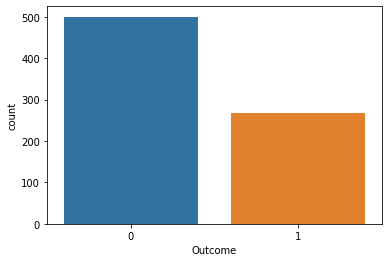

In [ ]:
sns.countplot(data['Outcome'])
plt.show()

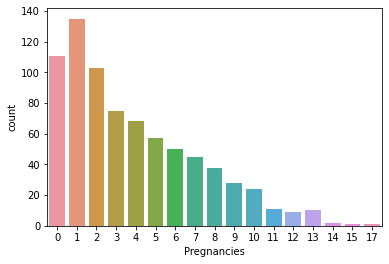

In [ ]:
sns.countplot(data['Pregnancies'])
plt.show()

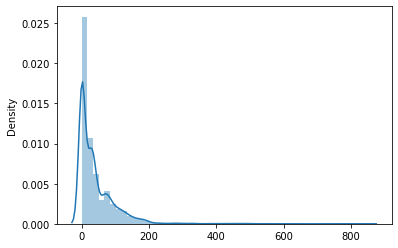

In [ ]:
sns.distplot(data)

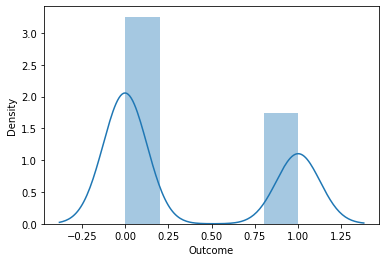

In [ ]:
sns.distplot(data['Outcome'])


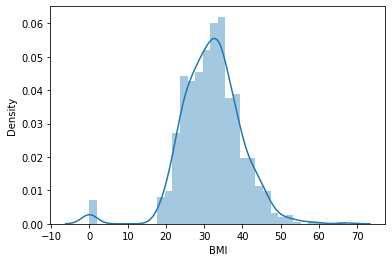

In [ ]:
sns.distplot(data['BMI'])

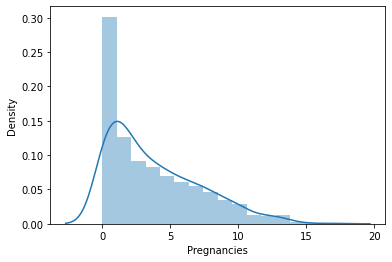

In [ ]:

sns.distplot(data['Pregnancies'])

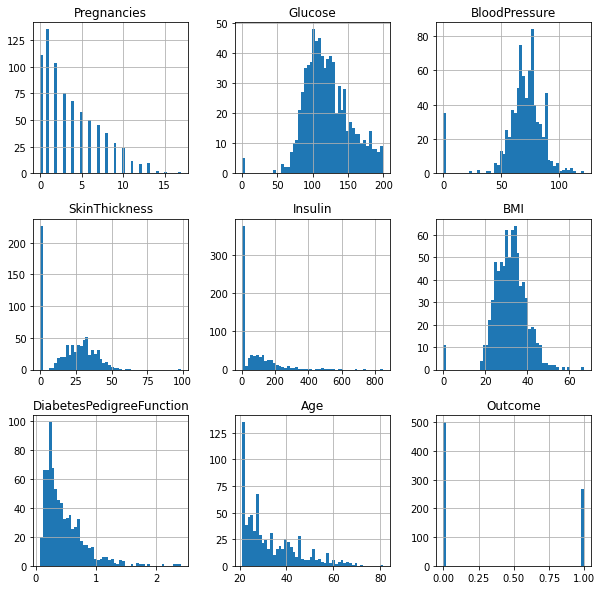

In [ ]:
data.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
X = data.drop(columns=['Outcome'])
Y = data['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=2)

In [ ]:
from sklearn.svm import SVC
SVM_Classifer = SVC()
SVM_Classifer.fit(X_train,Y_train)
pred_y = SVM_Classifer .predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score(SVM Model):",accuracy_score(Y_test,pred_y))

Accuracy Score(SVM Model): 0.7857142857142857


In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Classifer= LogisticRegression()
LR_Classifer.fit(X_train,Y_train)
Y_pred = LR_Classifer.predict(X_test)

print("Accuracy Score(LR Model):",accuracy_score(Y_test,Y_pred))

Accuracy Score(LR Model): 0.7532467532467533


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifer = KNeighborsClassifier(n_neighbors=3)
KNN_Classifer.fit(X_train,Y_train)
y_pred = KNN_Classifer.predict(X_test)

print("Accuracy Score(KNN Model):",accuracy_score(Y_test,y_pred))

Accuracy Score(KNN Model): 0.6818181818181818


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_Classifier = DecisionTreeClassifier(criterion='entropy',random_state=7)
DT_Classifier.fit(X_train,Y_train)
y_pred = DT_Classifier.predict(X_test)

print("Accuracy Score(DT Model):",accuracy_score(Y_test,y_pred))

Accuracy Score(DT Model): 0.6948051948051948


In [ ]:
from sklearn.neural_network import MLPClassifier

MLP_Classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
MLP_Classifier.fit(X_train,Y_train)
y_pred = MLP_Classifier.predict(X_test)

print("Accuracy Score(MLP Model):",accuracy_score(Y_test,y_pred))

Accuracy Score(MLP Model): 0.6948051948051948


In [ ]:
from sklearn.ensemble import VotingClassifier

SVM = SVC()
LR  = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=3)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
DT  = DecisionTreeClassifier(criterion='entropy',random_state=7)


Voting_classifier = VotingClassifier(estimators=[
    ('LR', LR), 
    ('SVM', SVM), 
    ('MLP', MLP),
    ('KNN', KNN),
    ('DT', DT),], voting='hard')


Voting_classifier = Voting_classifier.fit(X_train , Y_train )
y_pred = Voting_classifier.predict(X_test)

print("Accuracy Score(KNN Model):",accuracy_score(Y_test,y_pred))


Accuracy Score(KNN Model): 0.7662337662337663


In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(Y_test, y_pred)

print(cf_matrix)

[[93  7]
 [29 25]]


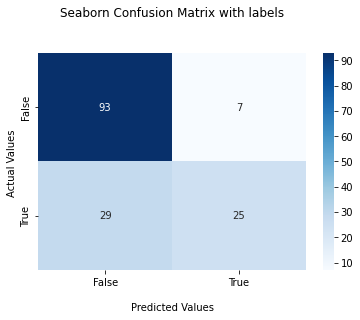

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()